In [1]:
from private.hypergraph import Hypergraph, hg_to_mol
from grammar_generation import random_produce

from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
from copy import deepcopy
import pickle5 as pickle
import torch
from os import listdir

In [11]:
expr_name_dict = dict()
#expr_name_dict['polymer_117motif'] = 'grammar-log/log_117motifs'
#expr_name_dict['test'] = 'log-num_generated_samples100-20220422-235705'
#expr_name_dict['iso'] = 'grammar-log/log_iso'
#expr_name_dict['acrylates'] = 'grammar-log/log_acy'
expr_name_dict['chain_extender'] = 'grammar-log/log_ce'

expr_names = list(expr_name_dict.keys())
generated_mols = dict()
for expr_name in expr_names:
    print('dealing with {}'.format(expr_name))
    ckpt_list = listdir(expr_name_dict[expr_name])[1:]
    max_R = 0
    max_R_ckpt = None
    for ckpt in ckpt_list:
        if 'grammar' in ckpt:
            curr_R = float(ckpt.split('_')[4][:-4])
            if curr_R > max_R:
                max_R = curr_R
                max_R_ckpt = ckpt
    print('loading {}'.format(max_R_ckpt))
    with open('{}/{}'.format(expr_name_dict[expr_name], max_R_ckpt), 'rb') as fr:
        grammar = pickle.load(fr)
    for i in range(32):
        mol, _ = random_produce(grammar)
        if expr_name not in generated_mols.keys():
            generated_mols[expr_name] = [mol]
        else:
            generated_mols[expr_name].append(mol)


dealing with chain_extender
loading best_grammar_epoch_14_1.1837988155284098.pkl
O=C(NCCO)NCCCCO
NCCCO
NCCO
O=C1C=CC(O)=CC=C(OCCOC(=O)CCc2ccc(O)cc2)CC1
NCCCO
Oc1ccc(O)cc1
C1CNCCN1
O=C(NCCO)NCCCCCCNCCCCNCCCO
NCCCCCO
OCCCO
NCCCO
Nc1ccc(N)cc1
OCCCCCCO
CC(O)CCCCNC(=O)NCCO
NC1=CC=C2C=CC(N)=CC=C(C=C1)SS2
NCCC(N)C(=O)CCO
OCCCCCCO
C1CNCCN1
C1CNCCN1
Oc1ccc(O)cc1
CC(O)NCCCCO
O=C(CO)NCCO
O=C(NCCO)NCCCCCCO
O=C(CCNCCO)NCCO
CC(O)CCNC(C)O
Oc1ccc(SSc2ccc(O)cc2)cc1
CC(O)NCCCCO
NC(CCCCCCCNCCO)C(=O)C(=O)NCCO
Nc1ccc(O)cc1
O=C(NCCO)NCCCCCCCO
NCCCC(N)C(=O)C(=O)NCCO
O=C(CCCCCNC(=O)NCCO)NCCO


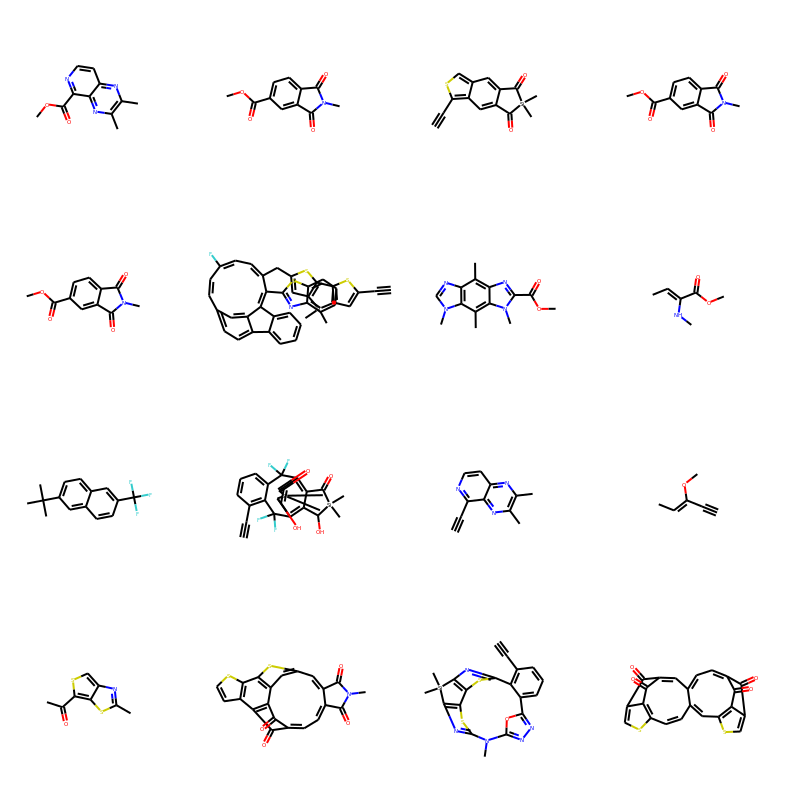

In [6]:
Chem.Draw.MolsToGridImage(generated_mols['polymer_117motif'], molsPerRow=4, subImgSize=(200,200))

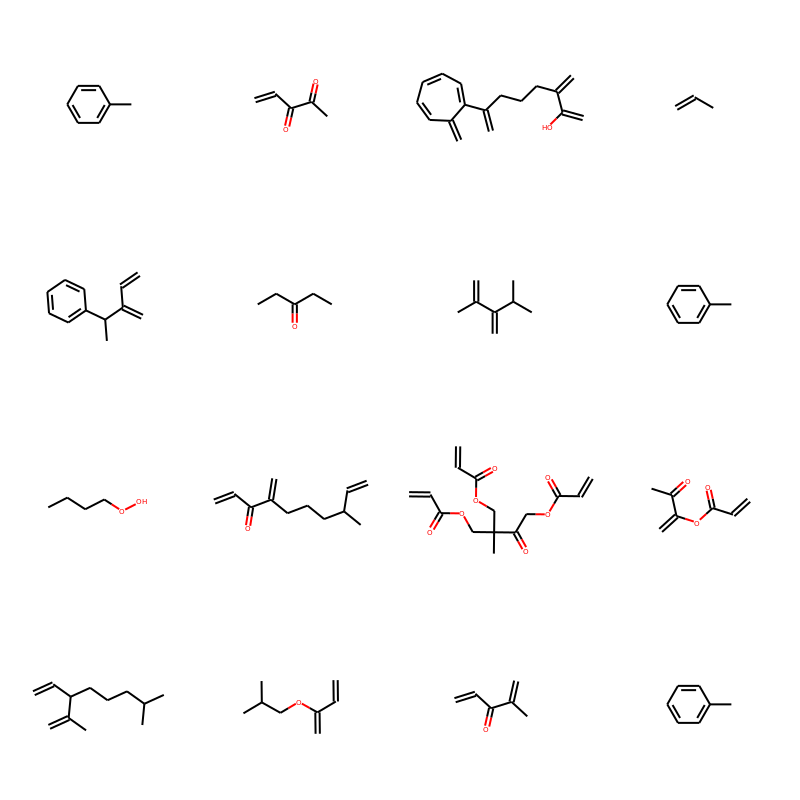

In [8]:
Chem.Draw.MolsToGridImage(generated_mols['acrylates'], molsPerRow=4, subImgSize=(200,200))

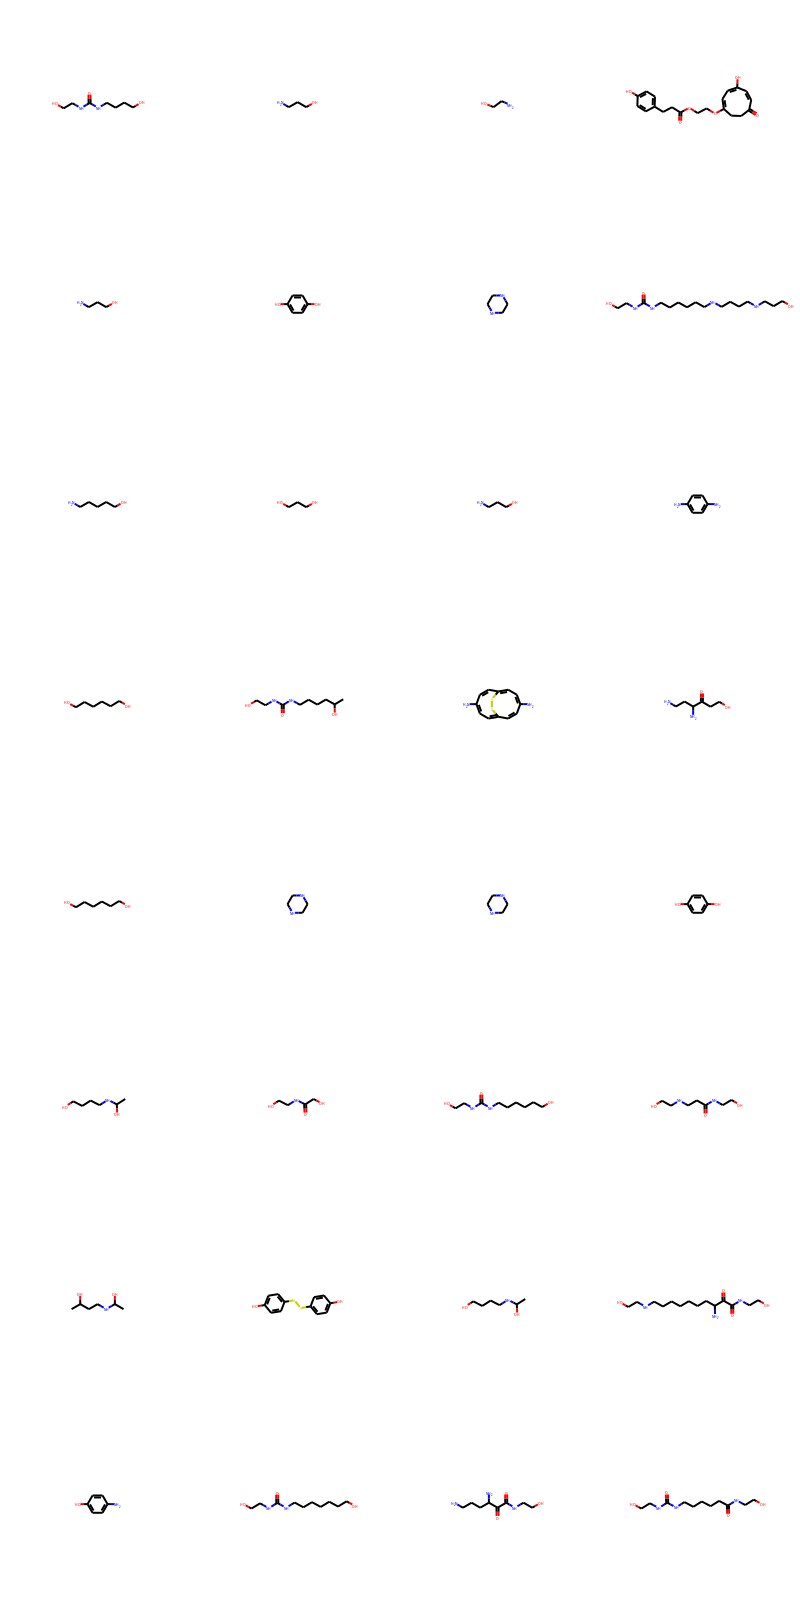

In [12]:
Chem.Draw.MolsToGridImage(generated_mols['chain_extender'], molsPerRow=4, subImgSize=(200,200))